In [2]:
from mdagent import MDAgent
import os

In [2]:
descriptive_prompt_10 = "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD of the simulation at 300 K. 5. Compute the radius of gyration over time for the simulation at 300 K. 6. Compute the SASA (solvent accessible surface area) for the simulation at 300 K. 7. Simulate for 1 ps at 400 K. 8. Compute the RMSD of the simulation at 400 K. 9. Compute the radius of gyration over time for the simulation at 400 K. 10. Compute the SASA (solvent accessible surface area) for the simulation at 400 K."
non_descriptive_prompt_10 = "Simulate 1LYZ for 1 ps at 300K and 400K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD, SASA, and radius of gyration of both simulations."

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
#todays date and time
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2024-10-25
time: 21:24:36


# descriptive prompt

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [6]:
agent_1.run(descriptive_prompt_10)

Thought:

 First, I need to download

 the PDB file 1LYZ

.
Action:
```
{


  "action": "P

DBFileDownloader",
  "action_input

": "1LYZ"
}
``

`


PDB file found with this ID: 1LYZ


Next,

 I need to determine how

 many residues are in the

 chains and beta sheets of the protein 

1LYZ.

Action

:
```
{
  "action":

 "GetTurns

BetaSheetsHelices",
  "

action_input": {
   

 "query": "1LYZ",


    "primary_accession": ""
 

 }
}
```

Next,

 I need to simulate the protein 1

LYZ for 1 ps at 

300 K.

Action:
```
{


  "action": "SetUpandRun

Function",
  "action_input": {


    "pdb_id

": "1LYZ_212440

",
    "forcefield_files": ["

amber99sbildn

.xml"],
    "

save": true,
    "system_params

": {
      "nonbondedMethod

": "NoCutoff",
      "

constraints": "None",
     

 "rigidWater": false


    },
    "integr

ator_params": {
      "integrator

_type": "LangevinMiddle",


      "Temperature": "300 * kel

vin",
      "Friction": "

1.0 / picoseconds",
     

 "Timestep": "0.002

 * picoseconds",
      "Pressure":

 "1.0 * bar"
   

 },
    "simulation_params": {
     

 "Ensemble": "NVT",


      "Number of Steps": 500

,
     

 "record_interval_steps": 10,


      "record_params": ["step",

 "potentialEnergy", "temperature"]
   

 }
  }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed due to a missing template

 for residue 1 (

LYS). I need to clean the

 PDB file to add the

 missing atoms.

Action:
```
{


  "action": "CleaningToolFunction

",
  "action_input": {
   

 "pdb_id": "1LYZ

_212440",
    "replace_non

standard_residues": true,
   

 "add_missing_atoms": true,
   

 "remove_heterogens": true,


    "remove_water": true,
   

 "add_hydrogens": true,


    "add_hydrogens_ph":

 7.0
  }
}


```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/pdb/1LYZ_raw_20241025_212440.pdb


Thought:

 Now that the PDB file is cleaned

, I can simulate the protein 1

LYZ for 1 ps at 

300 K.

Action:
```
{


  "action": "SetUpandRun

Function",
  "action_input": {


    "pdb_id": "1LY

Z_212449",
    "force

field_files": ["amber99sbild

n.xml"],
    "save": true

,
    "system_params": {
     

 "nonbondedMethod": "No

Cutoff",
      "constraints": "

None",
      "rigidWater":

 false
    },
    "integrator

_params": {
      "integrator_type

": "LangevinMiddle",
     

 "Temperature": "300 * kelvin

",
      "Friction": "1

.0 / picoseconds",
      "

Timestep": "

0.002 * picoseconds",
     

 "Pressure": "1.0 *

 bar"
    },
    "simulation_params

": {
      "Ensemble": "

NVT",
      "Number of Steps

": 500,
      "record_interval

_steps": 10,
      "record

_params": ["step", "potentialEnergy

", "temperature"]
    }
  }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b67ef39f030> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/simulations/NVT_1LYZ_212449_20241025_212453.py
['TRAJ_sim0_212453_1LYZ_212449_20241025_212453.dcd', 'run_robustness.sh', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'submit_robustness.sh', 'prompt10.ipynb', 'prompt9.ipynb', 'prompt2.ipynb', 'out', 'prompt8.ipynb', 'prompt6.ipynb', 'TOP_sim0_212453_1LYZ_212449_20241025_212453.pdb', 'prompt4.ipynb', 'LOG_sim0_212453_1LYZ_212449_20241025_212453.txt', 'prompt5.ipynb']


Thought:

 Now that the simulation is done

, I need to compute the RMSD

 of the simulation at 300 K.



Action:
```
{
  "action

": "ComputeRMSD",
 

 "action_input": {
    "top

_id": "top_sim0_212

453",
    "traj_id":

 "rec0_212453",
   

 "ref_top_id": "top_sim

0_212453",
    "ref

_traj_id": "rec0_212

453",
    "select": "protein

",
    "mol_name": "1

LYZ"
  }
}
```

Calculating RMSD...
Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/records/rmsd_1LYZ.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/figures/FIG_rmsd_1LYZ_20241025_212525.png


Thought:

 Now that the RMSD is

 calculated, I need to compute the radius

 of gyration over time for the simulation

 at 300 K.

Action:
``

`
{
  "action": "Radius

ofGyrationPerFrame",
 

 "action_input": {
    "tr

aj_file": "rec0_212

453",
    "top_file": "

top_sim0_212453"
 

 }
}
```

Thought:

 Now that the radius of gy

ration is calculated, I need to compute

 the SASA (solvent accessible surface

 area) for the simulation at 300

 K.

Action:
```
{
 

 "action": "SolventAccessibleSurface

Area",
  "action_input": {


    "top_fileid": "top

_sim0_212453",
    "

traj_fileid": "rec0

_212453",
    "molecule

_name": "1LYZ"
 

 }
}
```

Loading trajectory ...
Calcuating SASA ...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/records/sasa_1LYZ.csv
SASA plot saved to FIG_sasa_1LYZ_20241025_212613.png


Thought:

 Now that the SASA is

 calculated for the simulation at 300

 K, I need to simulate the protein

 1LYZ for 1 ps

 at 400 K.

Action:
``

`
{
  "action": "SetUp

andRunFunction",
  "action_input

": {
    "pdb_id": "

1LYZ_212449",
   

 "forcefield_files": ["amber99

sbildn.xml"],
    "save

": true,
    "system_params":

 {
      "nonbondedMethod":

 "NoCutoff",
      "constraints

": "None",
      "rigid

Water": false
    },
    "

integrator_params": {
      "integr

ator_type": "LangevinMiddle

",
      "Temperature": "400 *

 kelvin",
      "Friction":

 "1.0 / picoseconds",


      "Timestep": "0.

002 * picoseconds",
      "Pressure

": "1.0 * bar"


    },
    "simulation_params": {


      "Ensemble": "NVT

",
      "Number of Steps": 

500,
      "record_interval_steps":

 10,
      "record_params":

 ["step", "potentialEnergy", "

temperature"]
    }
  }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b67ec4171b0> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/simulations/NVT_1LYZ_212449_20241025_212617.py
['run_robustness.sh', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'submit_robustness.sh', 'prompt10.ipynb', 'prompt9.ipynb', 'prompt2.ipynb', 'out', 'TOP_sim0_212617_1LYZ_212449_20241025_212617.pdb', 'prompt8.ipynb', 'LOG_sim0_212617_1LYZ_212449_20241025_212617.txt', 'prompt6.ipynb', 'prompt4.ipynb', 'TRAJ_sim0_212617_1LYZ_212449_20241025_212617.dcd', 'prompt5.ipynb']


Thought:

 Now that the simulation is done,

 I need to compute the

 RMSD of the simulation at 400

 K.

Action:
```
{
 

 "action": "ComputeRMSD

",
  "action_input": {
   

 "top_id": "top_sim0

_212617",
    "traj

_id": "rec0_212617

",
    "ref_top_id": "

top_sim0_212617",
   

 "ref_traj_id": "rec0

_212617",
    "select":

 "protein",
    "mol_name":

 "1LYZ"
  }
}


```

Calculating RMSD...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/records/rmsd_1LYZ_1.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/figures/FIG_rmsd_1LYZ_20241025_212648.png


Thought:

 Now that the RMSD is calculated

, I need to compute the

 radius of gyration over time for the

 simulation at 400 K.

Action:


```
{
  "action": "

RadiusofGyrationPerFrame",


  "action_input": {
    "

traj_file": "rec0_

212617",
    "top_file":

 "top_sim0_212617"


  }
}
```

Thought:

 Now that the

 radius of gyration

 is calculated, I

 need to compute the SASA (sol

vent accessible surface area) for the simulation

 at 400 K.

Action:
``

`
{
  "action": "Sol

ventAccessibleSurfaceArea",
  "action

_input": {
    "top_fileid

": "top_sim0_212617

",
    "traj_fileid":

 "rec0_212617",
   

 "molecule_name": "1LY

Z"
  }
}
```


Loading trajectory ...
Calcuating SASA ...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_59/records/sasa_1LYZ_1.csv


SASA plot saved to FIG_sasa_1LYZ_20241025_212738.png


Thought:

 All tasks have been

 completed. I need

 to compile the results into a

 single response.

Action:
```
{


  "action": "Final Answer",


  "action_input": "The P

DB file 1LYZ was downloaded

 and cleaned

. The protein 1

LYZ was simulated for 1 ps

 at 300 K and 400 K

. The RMSD, radius

 of gyration, and SASA were

 calculated for both simulations. The

 results are as follows: 


- RMS

D at 300 K: rmsd

_1LYZ
- Radius of

 gyration at 300 K: r

gy_rec0_212

453
- SASA at 300

 K: sasa_1LYZ


- RMSD at 400 K

: rmsd_1LYZ_

1
- Radius of gyration at

 400 K: rgy_rec0

_212617
- SASA at

 400 K: sasa_1

LYZ_1
The

 protein 

1LYZ has 0 residues in

 the chains and beta sheets."
}


```

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [7]:
registry = agent_1.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_59
Files found in registry: 1LYZ_212440: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_212440
 1LYZ_212449: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_212453: Initial positions for simulation sim0_212453
 sim0_212453: Basic Simulation of Protein 1LYZ_212449
 rec0_212453: Simulation trajectory for protein 1LYZ_212449 and simulation sim0_212453
 rec1_212453: Simulation state log for protein 1LYZ_212449 and simulation sim0_212453
 rec2_212453: Simulation pdb frames for protein 1LYZ_212449 and simulation sim0_212453
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_212525: RMSD plot for 1LYZ
 rgy_rec0_212453: Radii of gyration per frame for rec0_212453
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_212613: Plot of SASA over time for 1LYZ
 top_sim0_212617: Initial positions for simulation sim0_212617
 sim0_212617: Basic Simulation of Protein 1LYZ_212449
 rec0_

In [8]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_id1 = matches[0]
traj_id2 = matches[1]
traj_path1 = registry.get_mapped_path(traj_id1)
traj_path2 = registry.get_mapped_path(traj_id2)
assert os.path.exists(traj_path1)
assert os.path.exists(traj_path2)

matches = re.findall(r"top_sim0_\d+", paths_and_descriptions)
top_id1 = matches[0]
top_id2 = matches[1]
top_path1 = registry.get_mapped_path(top_id1)
top_path2 = registry.get_mapped_path(top_id2)
assert os.path.exists(top_path1)
assert os.path.exists(top_path2)
print(f"It's asserted that file paths for {traj_id1}, {top_id1}, {traj_id2} and {top_id2} exist")

It's asserted that file paths for rec0_212453, top_sim0_212453, rec0_212453 and top_sim0_212617 exist


In [9]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

print("From first simulation:")
traj_path1 = registry.get_mapped_path(traj_id1)
top_path1 = registry.get_mapped_path(top_id1)
traj = md.load(traj_path1, top=top_path1)[0] # first frame
secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

From first simulation:


Number of residues in total:  129
Number of chains:  1
Number of residues in sheets:  16
Number of residues in helices:  57
Number of residues in coils:  56


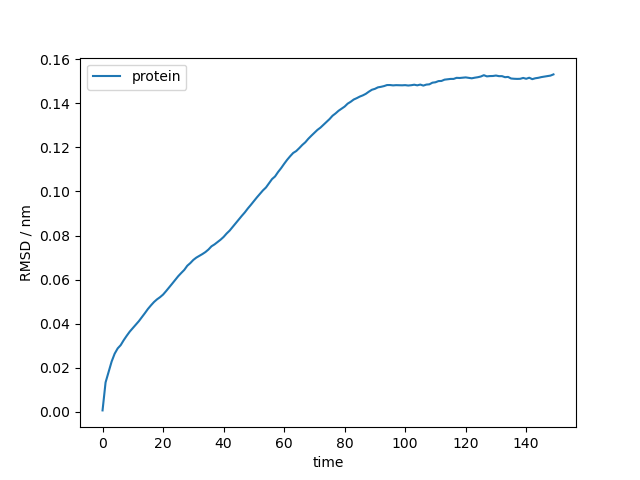

In [10]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

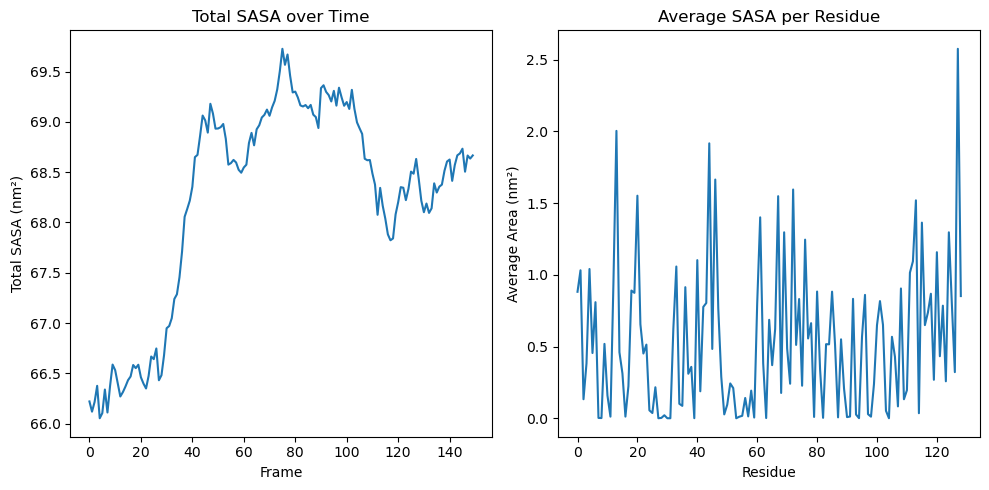

In [11]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

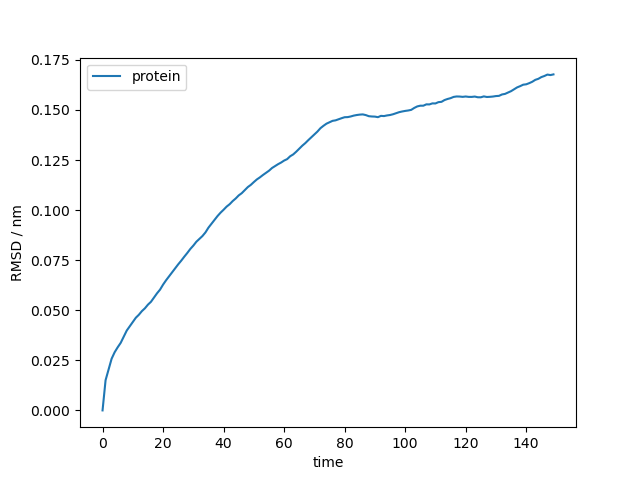

In [12]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)

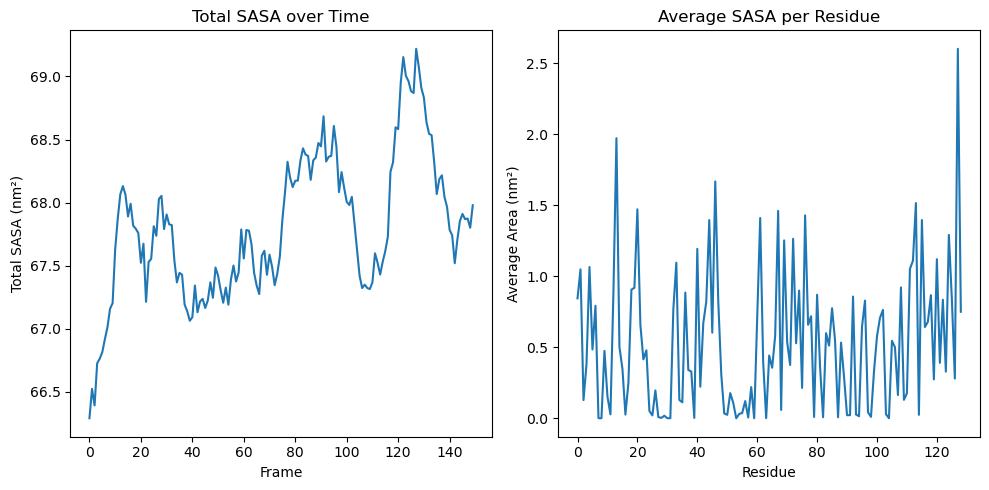

In [13]:
fig_id4 = matches[3]
fig_path4 = registry.get_mapped_path(fig_id4)
assert os.path.exists(fig_path4), f"This figure {fig_id4} does not exist."
Image(filename=fig_path4)

In [3]:
# Check RGy files
import re
registry = MDAgent(ckpt_dir="ckpt_59").path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()

matches = re.findall(r"rgy_rec0_\d+", paths_and_descriptions)
rgy_id = matches[0]
rgy_path = registry.get_mapped_path(rgy_id)
assert os.path.exists(rgy_path), "RGy file doesn't exist"
with open(rgy_path, "r") as f:
    lines = f.read().split("\n")
    for i in range(5):
        print(lines[i])

# Radius of Gyration (nm)
1.402196624229802069e+00
1.401963819052463034e+00
1.402061996215229867e+00
1.402218087401880808e+00


In [4]:
rgy_id = matches[1]
rgy_path = registry.get_mapped_path(rgy_id)
assert os.path.exists(rgy_path), "RGy file doesn't exist"
with open(rgy_path, "r") as f:
    lines = f.read().split("\n")
    for i in range(5):
        print(lines[i])

# Radius of Gyration (nm)
1.402143520160015644e+00
1.402016416393135012e+00
1.402074012139503001e+00
1.402072036664489429e+00


# non-descriptive prompt

In [16]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [17]:
agent_2.run(non_descriptive_prompt_10)

Thought:

 First, I need to download

 the PDB file for

 1LYZ and then set up

 and run two simulations at different temperatures.

 After the simulations

, I will analyze

 the results to find the

 number of residues in the chains and beta

 sheets, and compute the RMSD,

 SASA, and radius of gyration

.

Action:
```
{


  "action": "P

DBFileDownloader",
  "action_input

": "1LYZ"
}
``

`


PDB file found with this ID: 1LYZ


Thought:

 Now that I have the PDB file

, I can set up and run the

 simulations at 300K

 and 400K.

Action

:
```
{
  "action":

 "SetUpandRunFunction",
  "

action_input": {
    "pdb_id

": "1LYZ_212745

",
    "forcefield_files": ["

amber99sbildn.xml"],
   

 "save": true,


    "system_params": {
      "

nonbondedMethod": "NoC

utoff",
      "constraints":

 "None",
      "rigidWater

": false
   

 },
    "integrator_params": {


      "integrator_type": "L

angevinMiddle",
      "Temperature":

 "300 * kelvin",
      "

Friction": "1.0 /

 picoseconds",
      "Timestep":

 "0.002 * picoseconds",


      "Pressure": "1.0

 * bar"
    },
    "simulation

_params": {
      "Ensemble":

 "NVT",
      "Number of

 Steps": 500000

,
      "record_interval

_steps": 1000,
      "

record_params": ["step", "potential

Energy", "temperature"]
    }
 

 }
}
```

Note:

 I will run the simulation at 

300K first, and then I will

 repeat the process for 400

K. After both

 simulations are complete, I

 will analyze the results to find

 the number of residues in the chains and

 beta sheets, and compute the RMSD

, SASA, and radius of gy

ration.

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought:

 The simulation failed due to a missing template

 for residue 1 (LYS).

 I need to clean the

 PDB file to add the

 missing atoms before running the simulation.

Action

:
```
{
  "action":

 "CleaningToolFunction",
  "action

_input": {
    "pdb_id":

 "1LYZ_212745",


    "replace_nonstandard_residues

": true,
    "add_missing_atoms

": true,
    "remove_heter

ogens": true,
    "remove_water

": true,
    "add_hydro

gens": true,


    "add_h

ydrogens_ph": 7.0
  }
}


```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/pdb/1LYZ_raw_20241025_212745.pdb


Thought:

 Now that the PDB file is cleaned

, I can set up and run the

 simulations at 300K and 400

K.

Action:
```
{
 

 "action": "

SetUpandRunFunction",
  "action

_input": {
    "pdb_id":

 "1LYZ_212753",


    "forcefield_files": ["amber

99sbildn.xml"],
    "

save": true,
    "system_params

": {
      "nonbondedMethod

": "NoCutoff",
      "

constraints": "None",
      "rig

idWater": false
    },
   

 "integrator_params": {
      "

integrator_type": "Langevin

Middle",
      "Temperature": "300

 * kelvin",
      "Friction

": "1.0 / picoseconds

",
      "Timestep": "0

.002 * picoseconds",
      "

Pressure": "1.0 * bar

"
    },
    "simulation_params":

 {
      "Ensemble": "N

VT",
      "Number of Steps":

 500000,
      "record_interval

_steps": 1000,
      "

record_params": ["step", "potential

Energy", "temperature"]
    }
 

 }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b67ecc587e0> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/simulations/NVT_1LYZ_212753_20241025_212757.py
['run_robustness.sh', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'submit_robustness.sh', 'prompt10.ipynb', 'prompt9.ipynb', 'prompt2.ipynb', 'out', 'prompt8.ipynb', 'TRAJ_sim0_212757_1LYZ_212753_20241025_212758.dcd', 'prompt6.ipynb', 'prompt4.ipynb', 'TOP_sim0_212757_1LYZ_212753_20241025_212758.pdb', 'LOG_sim0_212757_1LYZ_212753_20241025_212758.txt', 'prompt5.ipynb']


Thought:

 Now that the simulation at

 300K is complete, I need

 to repeat the process for 400K

.

Action:
```
{


  "action": "SetUpandRun

Function",
  "action_input": {


    "pdb_id": "1LY

Z_212753",
    "force

field_files": ["amber99sbild

n.xml"],
    "save": true

,
    "system_params": {
     

 "nonbondedMethod": "No

Cutoff",
      "constraints": "

None",
      "rigidWater":

 false
    },
    "integrator

_params": {
      "integrator_type

": "LangevinMiddle",
     

 "Temperature": "400 * kelvin

",
      "Friction": "1

.0 / picoseconds",
      "

Timestep": "0.002 *

 picoseconds",
      "Pressure": "

1.0 * bar"
    },


    "simulation_params": {
      "

Ensemble": "NVT",
     

 "Number of Steps": 500000

,
      "record_interval_steps": 

1000,
      "record_params":

 ["step", "

potentialEnergy", "temperature"]
    }


  }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b67ecc5b9f0> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/simulations/NVT_1LYZ_212753_20241025_230148.py
['TRAJ_sim0_230148_1LYZ_212753_20241025_230149.dcd', 'run_robustness.sh', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'submit_robustness.sh', 'LOG_sim0_230148_1LYZ_212753_20241025_230149.txt', 'prompt10.ipynb', 'prompt9.ipynb', 'TOP_sim0_230148_1LYZ_212753_20241025_230149.pdb', 'prompt2.ipynb', 'out', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'prompt5.ipynb']


Thought:

 Now that both simulations are complete,

 I can analyze the results to find

 the number of residues in the chains and

 beta sheets, and compute the RMSD

, SASA, and radius of gy

ration.

Action:
```
{
 

 "action": "SummarizePro

teinStructure",
  "action_input":

 {
    "traj_file": "

rec0_212758",
    "

top_file": "top_sim0_

212757"
  }
}
```


Note: I will analyze the

 results for the simulation at 300

K first, and then I will

 repeat the process for

 400K.

Thought:

 Now that I have the summary of

 the protein structure for the simulation at

 300K, I can analyze the

 results to find the number of residues

 in the chains and beta sheets, and

 compute the RMSD, SASA,

 and radius of gyration.

Action

:
```
{
  "action":

 "ComputeDSS

P",
  "action_input": {


    "traj_file": "rec

0_212758",
    "top

_file": "top_sim0_212

757",
    "target_frames": "

all"
  }
}
```
Note

: I will analyze the

 results for the simulation at 300K

 first, and then I will repeat the

 process for 400K.

Thought:

 Now that I have the D

SSP analysis for the simulation at 

300K, I can analyze the

 results to find the number of residues in

 the chains and beta sheets, and compute

 the RMSD, SASA, and

 radius of gyration.

Action

:
```
{
  "action":

 "ComputeRMSD",
  "

action_input": {
    "traj

_id": "rec0_212758

",
    "top_id

": "top_sim0_212757

",
    "ref_traj_id": "

rec0_212758

",
    "ref_top_id": "

top_sim0_212757",
   

 "select": "protein",
    "

mol_name": "1LYZ"


  }
}
```
Note: I

 will analyze the results for the simulation at

 300K first, and then I

 will repeat the process for 400K

.

Calculating RMSD...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/records/rmsd_1LYZ.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/figures/FIG_rmsd_1LYZ_20241026_003537.png


Thought:

 Now that I have the RMS

D analysis for the simulation at 

300K, I can analyze the

 results to find the number of residues in

 the chains and beta sheets, and compute

 the SASA and radius of gyration

.

Action:
```
{
  "

action": "SolventAccessibleSurfaceArea

",
  "action_input": {
   

 "top_fileid": "top_sim

0_212757",
    "tr

aj_fileid": "rec0_

212758",
    "molecule_name

": "1LYZ"
  }


}
```
Note: I will analyze

 the results for the simulation at 300

K first, and then I will repeat

 the process for 400K.

Loading trajectory ...


Calcuating SASA ...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/records/sasa_1LYZ.csv


SASA plot saved to FIG_sasa_1LYZ_20241026_003809.png


Thought:

 Now that I have the SASA

 analysis for the simulation at 300K

, I can analyze the results to find

 the number of residues in the chains and

 beta sheets, and compute the radius of

 gyration.

Action:
```
{


  "action": "RadiusofG

yrationPerFrame",
  "action

_input": {
    "traj_file

": "rec0_212758",


    "top_file": "top_sim

0_212757"
  }
}


```
Note: I will analyze the

 results for the simulation at 300K

 first, and then I will repeat the

 process for 400K.

Thought:

 Now that I have the radius of

 gyration analysis for the simulation at 

300K, I can repeat the process

 for 400K.

Action

:
```
{
  "action":

 "SummarizeProteinStructure

",
  "action_input": {
   

 "traj_file": "rec0

_230149",
    "top_file

": "top_sim0_230148

"
  }
}
```
Note:

 I will analyze the results for the simulation

 at 400K.

Thought:

 Now that I have the summary of

 the protein structure for the simulation at 

400K, I can analyze the results

 to find the number of residues in the

 chains and beta sheets, and compute the

 RMSD, SASA, and radius

 of gyration.

Action:
```


{
  "action": "ComputeD

SSP",
  "action_input":

 {
    "traj_file": "

rec0_230149",
    "

top_file": "top_sim0_

230148",
    "target_frames":

 "all"
  }
}
```


Note: I will analyze the results for

 the simulation at 400K.

Thought:

 Now that I

 have the DSS

P analysis for the

 simulation at 400

K, I can

 analyze the results to

 find the number of

 residues in the chains

 and beta sheets,

 and compute the RMS

D, SASA

, and radius of

 gyration.

Action

:
```
{


  "action":

 "ComputeRMS

D",
  "

action_input": {


    "traj

_id": "rec

0_230149

",
    "top

_id": "top

_sim0_230

148",
    "

ref_traj_id":

 "rec0_

230149",
   

 "ref_top_id

": "top_sim

0_230148

",
    "select

": "protein",


    "mol_name

": "1LY

Z"
  }


}
```
Note

: I will analyze

 the results for the

 simulation at 400

K.

Calculating RMSD...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/records/rmsd_1LYZ_1.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/figures/FIG_rmsd_1LYZ_20241026_003822.png


Thought:

 Now that I

 have the RMSD

 analysis for the simulation

 at 400K

, I can analyze

 the results to find

 the number of residues

 in the chains and

 beta sheets, and

 compute the SASA

 and radius of gy

ration.

Action:


```
{
 

 "action": "

SolventAccessibleSurface

Area",
  "

action_input": {


    "top_file

id": "top

_sim0_230

148",
    "

traj_fileid

": "rec0

_230149",


    "molecule

_name": "1

LYZ"
 

 }
}
```


Note: I will

 analyze the results for

 the simulation at 

400K.

Loading trajectory ...
Calcuating SASA ...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_60/records/sasa_1LYZ_1.csv


SASA plot saved to FIG_sasa_1LYZ_20241026_004053.png


Thought:

 Now that I

 have the SASA

 analysis for the simulation

 at 400K

, I can analyze

 the results to find

 the number of residues

 in the chains and

 beta sheets, and

 compute the radius of

 gyration.

Action

:
```
{


  "action":

 "RadiusofG

yrationPerFrame

",
  "action

_input": {
   

 "traj_file

": "rec0

_230149",


    "top_file

": "top_sim

0_230148

"
  }
}


```
Note:

 I will analyze the

 results for the simulation

 at 400K

. After

 this

, I will have

 all the necessary information

 to provide a

 final

 answer.

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [18]:
registry = agent_2.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_60
Files found in registry: 1LYZ_212745: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_212745
 1LYZ_212753: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_212757: Initial positions for simulation sim0_212757
 sim0_212757: Basic Simulation of Protein 1LYZ_212753
 rec0_212758: Simulation trajectory for protein 1LYZ_212753 and simulation sim0_212757
 rec1_212758: Simulation state log for protein 1LYZ_212753 and simulation sim0_212757
 rec2_212758: Simulation pdb frames for protein 1LYZ_212753 and simulation sim0_212757
 top_sim0_230148: Initial positions for simulation sim0_230148
 sim0_230148: Basic Simulation of Protein 1LYZ_212753
 rec0_230149: Simulation trajectory for protein 1LYZ_212753 and simulation sim0_230148
 rec1_230149: Simulation state log for protein 1LYZ_212753 and simulation sim0_230148
 rec2_230149: Simulation pdb frames for

In [19]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_id1 = matches[0]
traj_id2 = matches[1]
traj_path1 = registry.get_mapped_path(traj_id1)
traj_path2 = registry.get_mapped_path(traj_id2)
assert os.path.exists(traj_path1)
assert os.path.exists(traj_path2)

matches = re.findall(r"top_sim0_\d+", paths_and_descriptions)
top_id1 = matches[0]
top_id2 = matches[1]
top_path1 = registry.get_mapped_path(top_id1)
top_path2 = registry.get_mapped_path(top_id2)
assert os.path.exists(top_path1)
assert os.path.exists(top_path2)
print(f"It's asserted that file paths for {traj_id1}, {top_id1}, {traj_id2} and {top_id2} exist")

It's asserted that file paths for rec0_212758, top_sim0_212757, rec0_230149 and top_sim0_230148 exist


In [20]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

print("From first simulation:")
traj_path1 = registry.get_mapped_path(traj_id1)
top_path1 = registry.get_mapped_path(top_id1)
traj = md.load(traj_path1, top=top_path1)[0] # first frame
secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

From first simulation:
Number of residues in total:  129
Number of chains:  1
Number of residues in sheets:  12
Number of residues in helices:  50
Number of residues in coils:  67


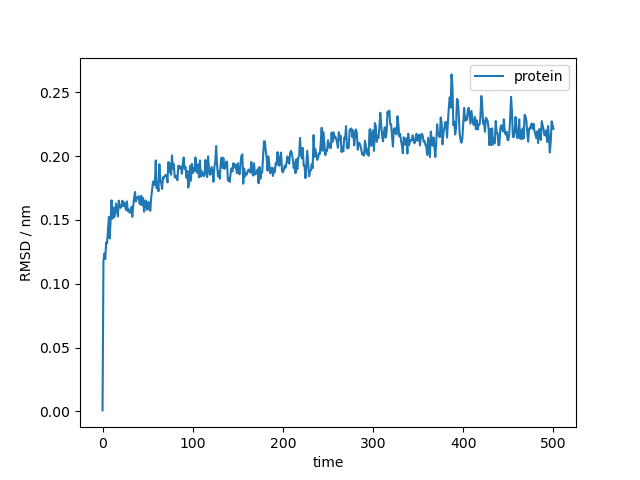

In [21]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

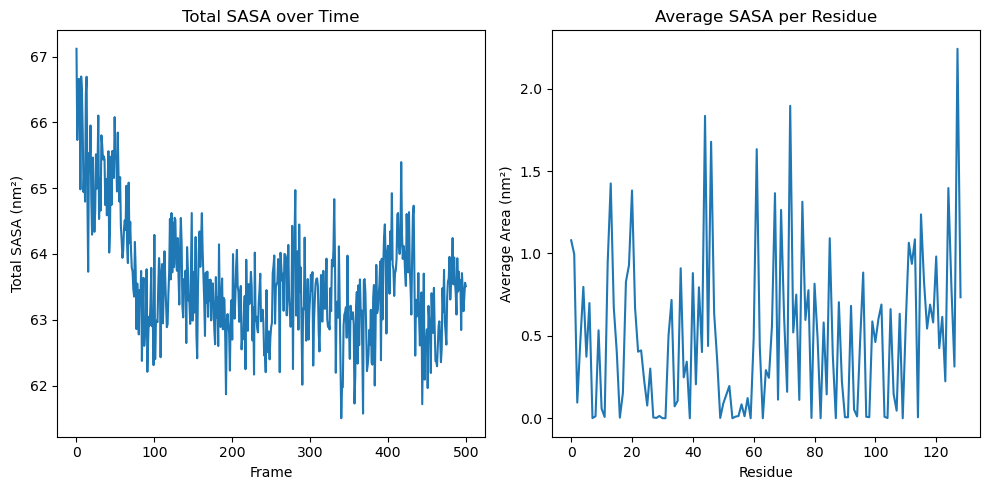

In [22]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

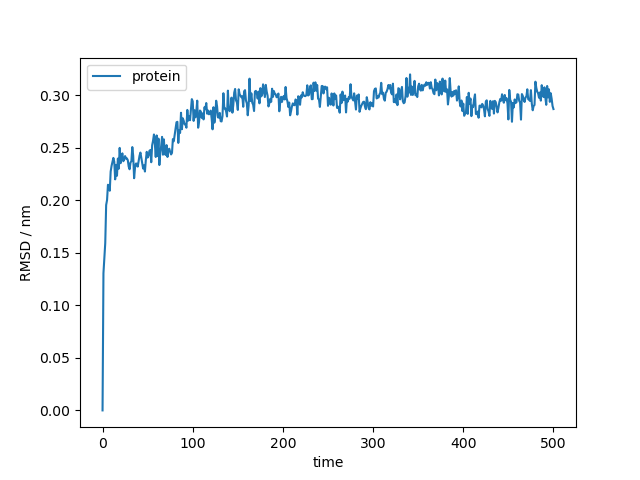

In [23]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)

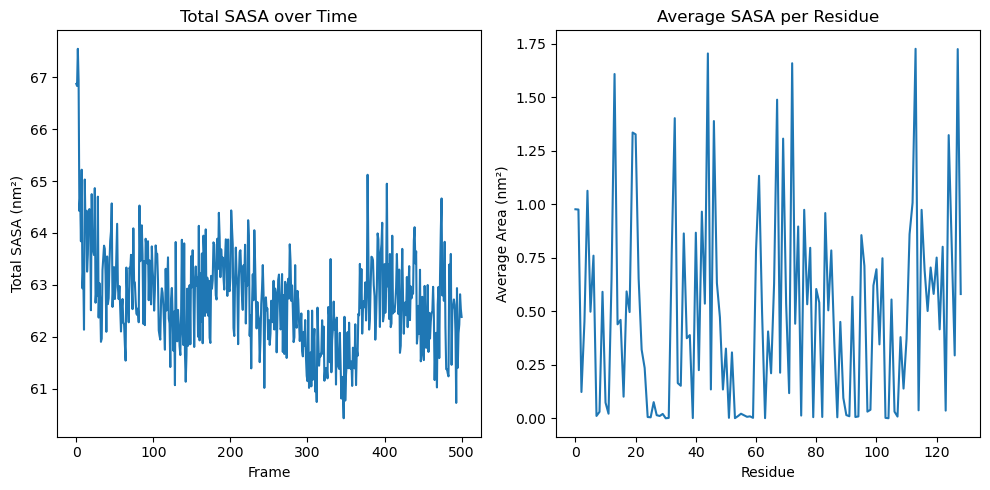

In [24]:
fig_id4 = matches[3]
fig_path4 = registry.get_mapped_path(fig_id4)
assert os.path.exists(fig_path4), f"This figure {fig_id4} does not exist."
Image(filename=fig_path4)

In [5]:
# Check RGy files
import re
registry = MDAgent(ckpt_dir="ckpt_60").path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()

matches = re.findall(r"rgy_rec0_\d+", paths_and_descriptions)
rgy_id = matches[0]
rgy_path = registry.get_mapped_path(rgy_id)
assert os.path.exists(rgy_path), "RGy file doesn't exist"
with open(rgy_path, "r") as f:
    lines = f.read().split("\n")
    for i in range(5):
        print(lines[i])

# Radius of Gyration (nm)
1.413587245942312443e+00
1.410707859539359843e+00
1.412525919804704877e+00
1.414513610096814311e+00


In [6]:
rgy_id = matches[1]
rgy_path = registry.get_mapped_path(rgy_id)
assert os.path.exists(rgy_path), "RGy file doesn't exist"
with open(rgy_path, "r") as f:
    lines = f.read().split("\n")
    for i in range(5):
        print(lines[i])

# Radius of Gyration (nm)
1.417251966802428598e+00
1.422167179852466656e+00
1.419499592763379114e+00
1.421420745900668470e+00
